<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [27]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become Familiar with the Dataset
First, we will load the dataset and examine its structure and basic statistics.
Display the first few rows of the dataframe


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2 Generate Descriptive Statistics and Visualizations
Boxplot for Median Value of Owner-Occupied Homes (MEDV):

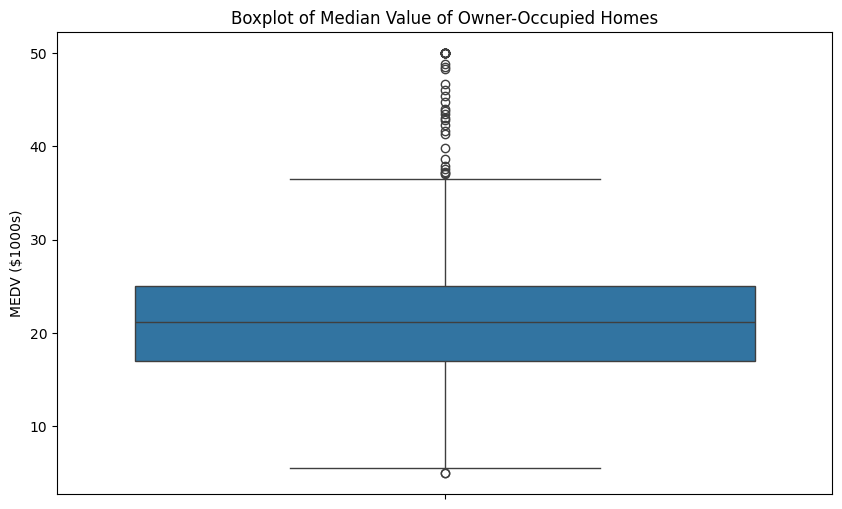

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Bar Plot for Charles River Variable (CHAS):

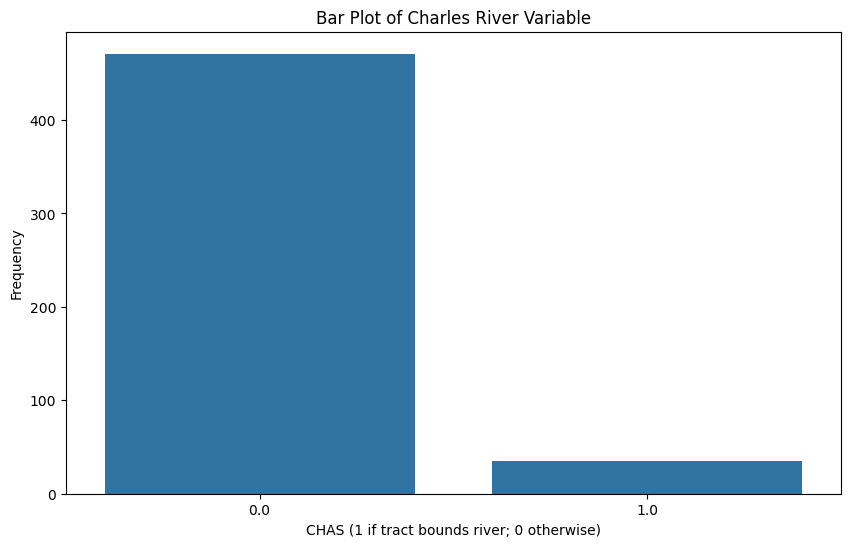

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for MEDV vs AGE:
First, discretize the AGE variable:

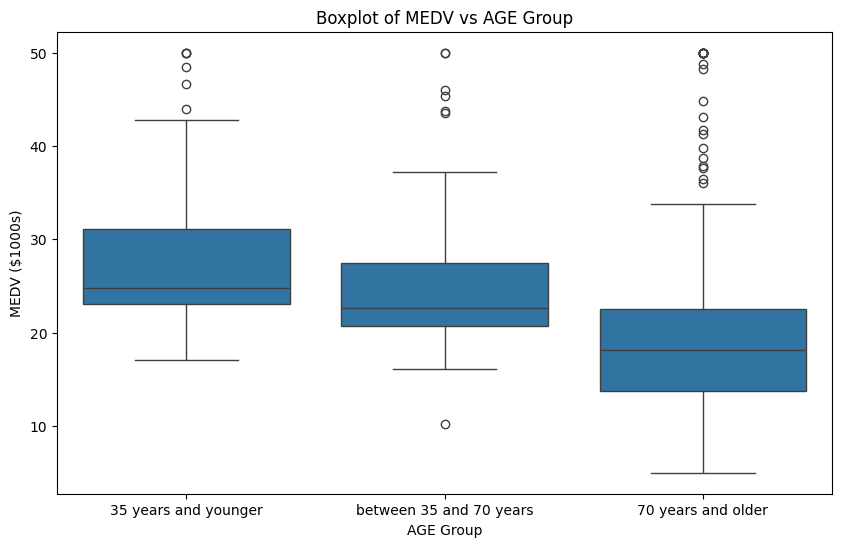

In [22]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Scatter Plot of NOX vs INDUS:

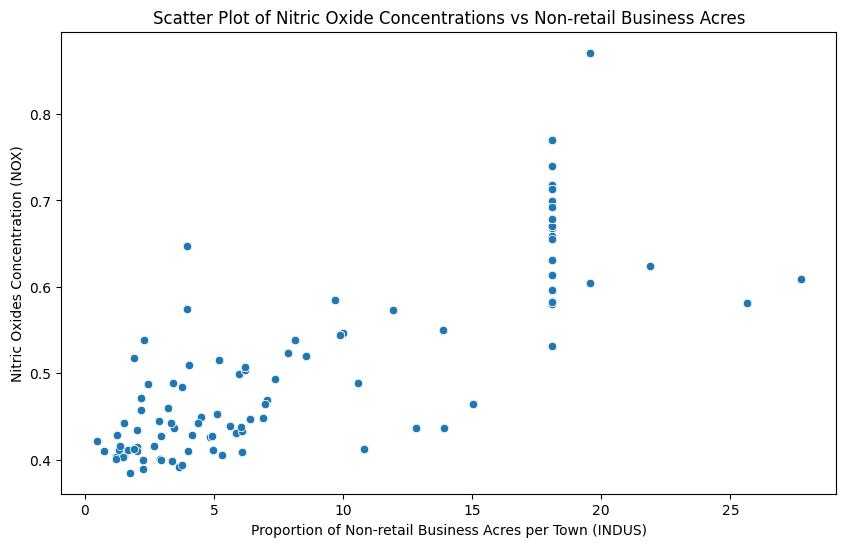

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-retail Business Acres')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()


# Histogram for Pupil-Teacher Ratio (PTRATIO):

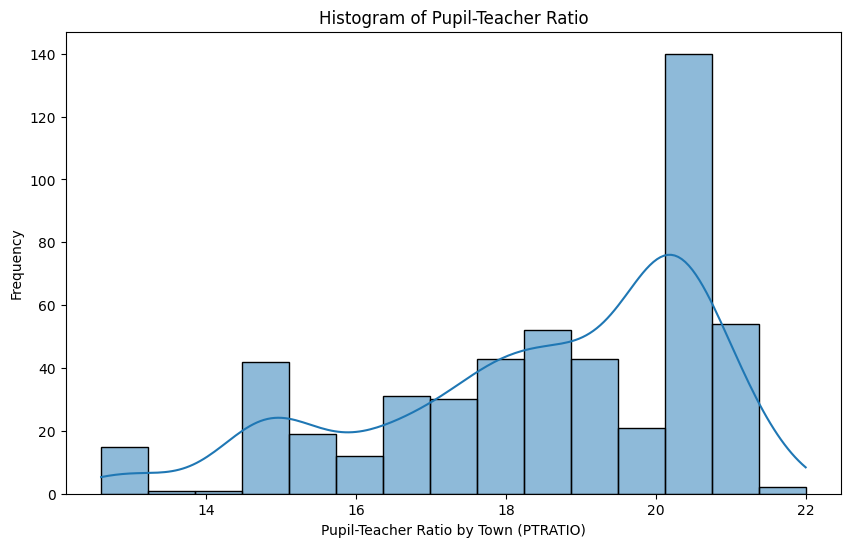

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio by Town (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

# Task 3: Use the Appropriate Tests to Answer the Questions
T-test for Independent Samples: MEDV by CHAS:

In [28]:
# Hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not.
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(chas1, chas0)
print(f"T-test: t_stat = {t_stat}, p_value = {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")


T-test: t_stat = 3.996437466090509, p_value = 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median values.


ANOVA: MEDV by AGE:

In [29]:
# Hypothesis: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).
model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV across different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV across different age groups.")

                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in MEDV across different age groups.


Pearson Correlation: NOX and INDUS:

In [30]:
# Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: correlation = {correlation}, p_value = {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")


Pearson Correlation: correlation = 0.7636514469209192, p_value = 7.913361061210442e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


Regression Analysis: DIS on MEDV:

In [31]:
# Hypothesis: There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

# Conclusion
if model.pvalues[1] < 0.05:
    print("Reject the null hypothesis: There is a significant impact of DIS on MEDV.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of DIS on MEDV.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        10:20:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0